# This notebook shows how to convert from Oxide wt% to element wt% and back again

In [1]:
import numpy as np
import pandas as pd
import Thermobar as pt#
pd.options.display.max_columns = None
pd.options.display.max_rows = None
import matplotlib.pyplot as plt

## Load in oxide wt % values (in this case, from plag)

In [2]:
ExcelIn_TB=pt.import_excel('Ox_to_element.xlsx', sheet_name="Plag")
ExcelIn_Plag=ExcelIn_TB['Plags']
Excel_In=ExcelIn_TB['my_input']
display(ExcelIn_Plag.head())

,SiO2_Plag,TiO2_Plag,Al2O3_Plag,FeOt_Plag,MnO_Plag,MgO_Plag,CaO_Plag,Na2O_Plag,K2O_Plag,Cr2O3_Plag,Sample_ID_Plag
0,54.67,0.24,26.81,1.47,0.0,0.42,10.59,4.55,0.35,0.0,0
1,52.05,0.07,29.26,0.81,0.0,0.15,12.26,4.07,0.17,0.0,1
2,52.73,0.07,28.73,0.77,0.0,0.13,11.44,4.58,0.18,0.0,2
3,56.89,0.01,26.88,0.21,0.0,0.01,8.55,6.06,0.16,0.0,3
4,54.54,0.02,26.92,0.19,0.0,0.04,8.42,6.03,0.18,0.0,4


## Convert to element wt%
- You have to specify the suffix on the data, so that Thermobar knows how to strip it off to do the processing, e.g. in this case _Plag
- By default, it includes oxygen, this means that O is added to sum to 100

In [3]:
wt_calc_withO=pt.convert_oxide_percent_to_element_weight_percent(df=ExcelIn_Plag, 
                                            suffix="_Plag", without_oxygen=False)
wt_calc_withO.head()

,Si_wt,Mg_wt,Fe_wt,Ca_wt,Al_wt,Na_wt,K_wt,Mn_wt,Ti_wt,Cr_wt,P_wt,F_wt,H_wt,Cl_wt,O_wt_make_to_100
0,25.554795,0.253278,1.142613,7.568359,14.189250,3.375448,0.290555,0.0,0.143784,0.0,0.0,0.0,0.0,0.0,47.481919
1,24.330109,0.090456,0.629603,8.761859,15.485918,3.019357,0.141127,0.0,0.041937,0.0,0.0,0.0,0.0,0.0,47.499635
2,24.647966,0.078395,0.598511,8.175829,15.205414,3.397704,0.149428,0.0,0.041937,0.0,0.0,0.0,0.0,0.0,47.704814
3,26.592505,0.006030,0.163230,6.110432,14.226298,4.495652,0.132825,0.0,0.005991,0.0,0.0,0.0,0.0,0.0,48.267037
4,25.494028,0.024122,0.147685,6.017525,14.247468,4.473396,0.149428,0.0,0.011982,0.0,0.0,0.0,0.0,0.0,49.434367


## Lets compare this to that calculated by EPMA software

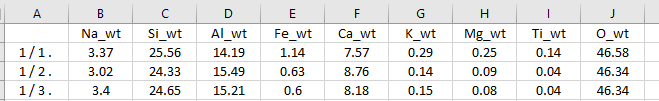

### Without oxygen

In [4]:
wt_calc_withoutO=pt.convert_oxide_percent_to_element_weight_percent(df=ExcelIn_Plag, 
                                            suffix="_Plag", without_oxygen=True)
wt_calc_withoutO.head()

,Si_wt_noO2,Mg_wt_noO2,Fe_wt_noO2,Ca_wt_noO2,Al_wt_noO2,Na_wt_noO2,K_wt_noO2,Mn_wt_noO2,Ti_wt_noO2,Cr_wt_noO2,P_wt_noO2,F_wt_noO2,H_wt_noO2,Cl_wt_noO2
0,48.659041,0.482267,2.175656,14.410959,27.017838,6.427211,0.553247,0.0,0.273781,0.0,0.0,0.0,0.0,0.0
1,46.342742,0.172296,1.199235,16.689139,29.496781,5.751116,0.268811,0.0,0.079880,0.0,0.0,0.0,0.0,0.0
2,47.132382,0.149909,1.144487,15.634000,29.076126,6.497164,0.285740,0.0,0.080193,0.0,0.0,0.0,0.0,0.0
3,51.403406,0.011657,0.315525,11.811486,27.499483,8.690111,0.256751,0.0,0.011581,0.0,0.0,0.0,0.0,0.0
4,50.417698,0.047704,0.292065,11.900424,28.176188,8.846712,0.295513,0.0,0.023696,0.0,0.0,0.0,0.0,0.0
